# Predictive Modeling of Customer Visits Data

**Author:** ADELEYE Victor Mayowa

## Objective
The objective of this analysis is to build a predictive model to determine whether a customer will make a purchase on the website based on their visit data.

## Brief Introduction
In the digital landscape, understanding customer behavior is crucial for enhancing user experience and driving sales. By analyzing customer visit data, we can identify patterns that indicate purchase likelihood. This project utilizes a dataset comprising 12,330 sessions of customer visits to a website over a one-year period, allowing us to develop a model that predicts revenue generation.

## Dataset
The dataset consists of data points from 12,330 sessions of customer visits to the website. Each session is associated with a unique user to minimize biases related to specific campaigns, special days, user profiles, or periods.

### Attributes and Meaning

The dataset contains a total of **18 attributes**: 
- **10 Numerical Attributes**
- **8 Categorical Attributes**

### Attribute Information
- **Revenue**: Class level. Possible values: **False** (did not buy) and **True** (made a purchase).
- **Administrative**: Number of administrative pages visited during the session.
- **Administrative Duration**: Total time spent on administrative pages in seconds.
- **Informational**: Number of informational pages visited during the session.
- **Informational Duration**: Total time spent on informational pages in seconds.
- **Product Related**: Number of product-related pages visited during the session.
- **Product Related Duration**: Total time spent on product-related pages in seconds.
- **Bounce Rate**: Percentage of visitors who leave the site after viewing only one page.
- **Exit Rate**: Percentage of exits on a specific page.
- **Page Value**: Average value of a web page prior to completing an e-commerce transaction.
- **Special Day**: Indicates the proximity of the visit date to a specific special day.
- **Operating System**: The operating system used by the visitor.
- **Browser**: The browser used to access the website.
- **Region**: Geographic region of the visitor.
- **Traffic Type**: Type of traffic (e.g., direct, referral).
- **Visitor Type**: Indicates whether the visitor is new or returning.
- **Weekend**: Boolean indicating whether the visit occurred on a weekend.
- **Month**: Month of the year during which the visit occurred.

## CASE STUDY
In this case study, we will build a predictive model using the customer visits data to predict whether a customer will buy a product based on their interaction with the website.


In [64]:
# IMPORT PACKAGES

# Data loadiing and EDA packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#statistical and ml model packages
import sklearn as sk
from scipy.stats import kruskal, mannwhitneyu, friedmanchisquare, f_oneway, ttest_ind,spearmanr, shapiro, levene
from sklearn.cluster import KMeans
import statsmodels.api as sm

# preprocessing packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# model packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation packages
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#### Data Loading fom UCI library

In [2]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
online_shoppers_purchasing_intention_dataset = pd.read_csv("online_shoppers_intention.csv") #fetch_ucirepo(id=468) 

In [3]:
online_shoppers_purchasing_intention_dataset.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

#### Exploration Data Analysis

In [4]:
# data (as pandas dataframes) : X as independent features, y as dependent feature also the target
# X = online_shoppers_purchasing_intention_dataset.data.features 
# y = online_shoppers_purchasing_intention_dataset.data.targets 

In [5]:
# type(y)

In [6]:
# merge the features and target side by side for exploratin
# df = pd.concat([X, y], axis=1)

In [7]:
online_shoppers_purchasing_intention_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df = online_shoppers_purchasing_intention_dataset.copy()

In [9]:
df_copy = df.copy()

In [10]:
# check for the 10 random samples
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6328,10,168.906667,2,18.4,36,853.850272,0.000000,0.007752,5.647994,0.0,Oct,3,2,3,2,Returning_Visitor,True,False
771,0,0.000000,0,0.0,11,1390.166667,0.012121,0.014545,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,True,False
8352,1,40.500000,0,0.0,49,1587.250000,0.000000,0.011538,35.799695,0.0,Nov,2,2,3,13,Returning_Visitor,False,True
5142,2,78.000000,0,0.0,15,269.750000,0.000000,0.013333,22.738000,0.0,May,3,2,4,2,New_Visitor,False,True
5807,1,28.200000,1,36.2,130,9447.578514,0.012661,0.025758,0.000000,0.0,Sep,1,2,5,1,Returning_Visitor,False,False
4764,0,0.000000,0,0.0,75,1289.250000,0.005479,0.017352,11.829041,0.8,May,2,2,1,4,Returning_Visitor,False,True
9427,0,0.000000,0,0.0,4,32.000000,0.000000,0.050000,0.000000,0.0,Dec,2,2,3,2,Returning_Visitor,False,False
9304,0,0.000000,0,0.0,45,801.050000,0.004444,0.019444,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
8523,5,73.750000,0,0.0,131,2244.616667,0.005344,0.017506,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,False
1202,2,197.000000,4,219.0,53,1518.761111,0.007273,0.005455,0.000000,0.0,Mar,1,1,6,2,Returning_Visitor,True,False


In [11]:
# Get the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

After data loading from the online repository, it was discovered that most of the categorical variables have been changed to integers i.e numerical. To convert the specified integer columns back to categorical and boolean types in a new DataFrame called df_pure, you can use the astype() method in pandas. Here's how to do it step by step:

In [12]:
df_pure = df.copy()

# Convert specified columns to categorical
df_pure['OperatingSystems'] = df_pure['OperatingSystems'].astype('category')
df_pure['Browser'] = df_pure['Browser'].astype('category')
df_pure['Region'] = df_pure['Region'].astype('category')
df_pure['TrafficType'] = df_pure['TrafficType'].astype('category')
df_pure['VisitorType'] = df_pure['VisitorType'].astype('category')
df_pure['Month'] = df_pure['Month'].astype('category')


# Check the new DataFrame and data ty
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [13]:
# Get the list of numerical columns
numerical_columns = df_pure.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

# Get the list of categorical columns
categorical_columns = df_pure.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("\nCategorical Columns:\n", categorical_columns)

Numerical Columns:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

Categorical Columns:
 ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [14]:
missing_values=df.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### EDA: Visualization

In [15]:
target_name = "Revenue"

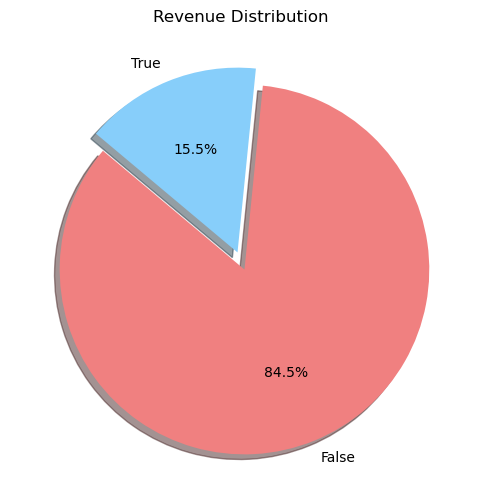

In [16]:
# Calculate the percentage of each revenue outcome
revenue_counts = df['Revenue'].value_counts()
revenue_labels = ['False', 'True']
revenue_sizes = revenue_counts.values
revenue_percentages = [f'{value / len(df) * 100:.1f}%' for value in revenue_sizes]

# Define explosion for a small separation between segments
explode = (0.05, 0.05)  # Adjust the values for more/less separation

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    revenue_sizes,
    labels=revenue_labels,
    autopct='%1.1f%%',  # Auto format percentage labels
    explode=explode,
    startangle=140,
    shadow=True,
    colors=['lightcoral', 'lightskyblue']
)

# Title and show
plt.title("Revenue Distribution")
plt.show()

In [17]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [18]:
# Use a colormap from Matplotlib
custom_palette = sns.color_palette("viridis", n_colors=3)  # Specify number of colors

# Set the custom palette
sns.set_palette(custom_palette)


### Univariate Analysis

In [19]:
def plot_categorical_univariate(df, categorical_features):
    """
    Plots univariate analysis for categorical variables in the given DataFrame,
    with percentages labeled on top of each bar.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    categorical_features (list): List of categorical feature names to plot.

    Returns:
    None: Displays the plots.
    """
    
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    # Create subplots for each categorical feature
    num_features = len(categorical_features)
    fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, num_features * 3))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(categorical_features):
        # Create a count plot for each categorical feature
        ax = sns.countplot(data=df, x=feature, ax=axes[i], palette='Set2')
        
        # Calculate total count for percentages
        total = len(df)
        
        # Annotate percentages on top of bars
        for p in ax.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10)

        axes[i].set_title(f'Count of {feature}', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


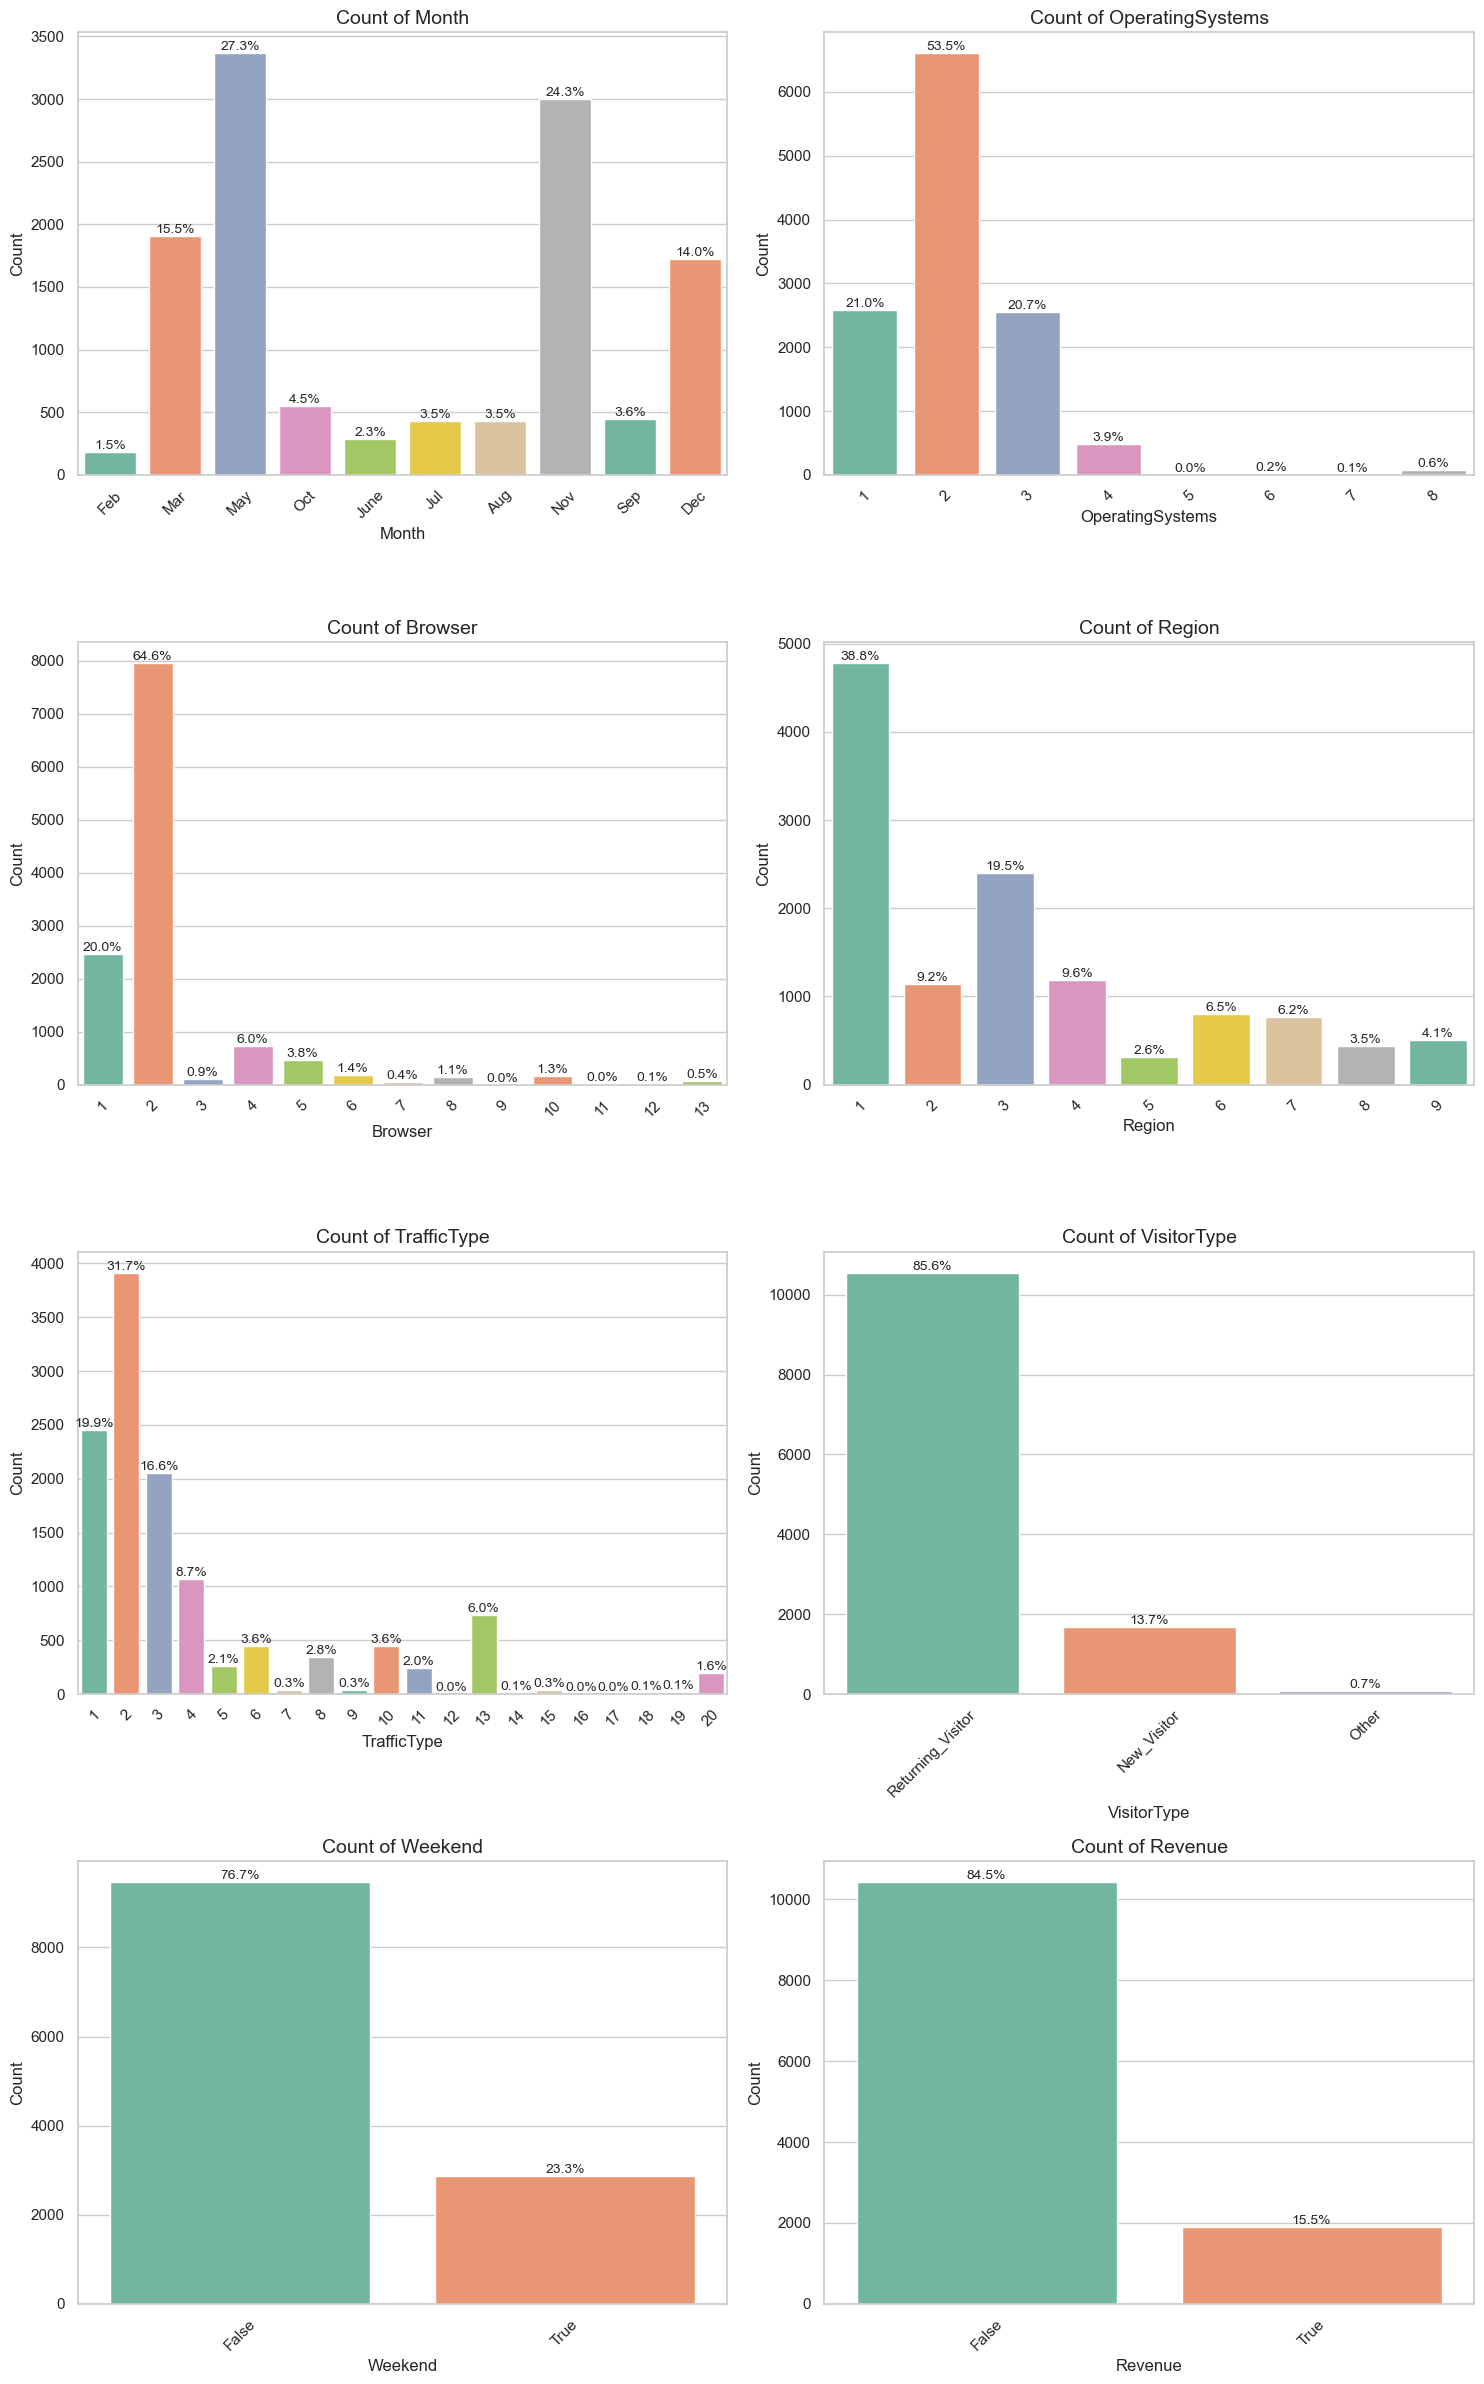

In [20]:
plot_categorical_univariate(df, categorical_columns)

### Bivariate Analysis

In [21]:
def categorical_plot(df, x: str, y:str):
    """
    Create a bar plot showing the percentage distribution of a categorical variable.

    This function takes a DataFrame and two categorical column names, groups the data
    by the first column, calculates the percentage of occurrences for each category
    in the second column, and creates a bar plot. The bars are annotated with percentage
    values.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the data to be plotted.
    x : str
        The name of the column to be used for the x-axis (categorical variable).
    y : str
        The name of the column to be used for grouping (categorical variable).

    Returns:
    --------
    None
        The function displays the plot and does not return any value.

    Notes:
    ------
    - Ensure that the `y` column contains categorical data. 
    - The function automatically converts boolean values in the `y` column to strings.
    - The plot will show the percentage distribution of the `y` variable for each category in the `x` variable.

    """
    # Convert boolean values to strings for the Weekend column
    df[y] = df[y].astype(str)

    # Group by x  and y, and calculate percentage
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    # Create the catplot
    g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1)

    # Set y-axis limits
    g.ax.set_ylim(0, 100)

    # Add percentage labels on the bars
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width() / 2  # Center the text
        txt_y = p.get_height()
        g.ax.text(txt_x, txt_y, txt, ha='center', va='bottom')  # Align the text

    # Show the plot
    plt.show()


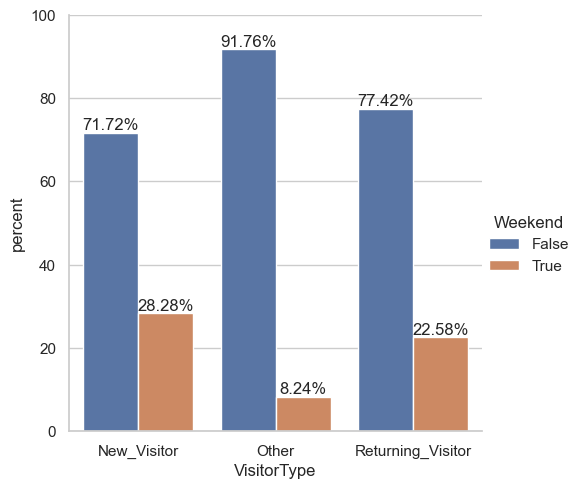

In [22]:
x, y = 'VisitorType', 'Weekend'
categorical_plot(df, x, y)

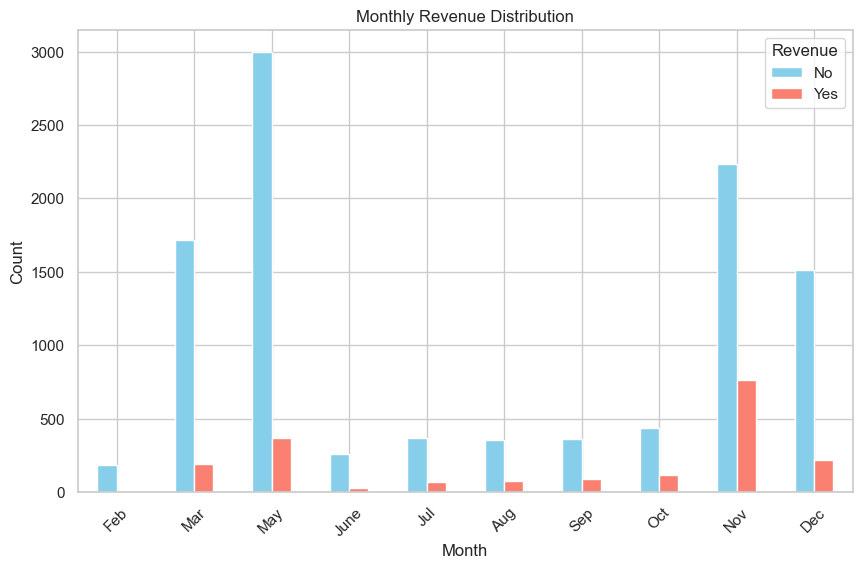

In [23]:
# Convert 'Month' column to an ordered categorical type to ensure the correct order
months_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# Aggregate or count the Revenue categories by Month
monthly_revenue = df.groupby(['Month', 'Revenue']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue', labels=['No', 'Yes'])  # Adjust labels if needed
plt.show()

In [24]:
# Function to plot numerical variables
def plot_histogram_vs_revenue(df, column):
    plt.figure(figsize=(4,4))
    sns.histplot(data=df, x=column, hue='Revenue', multiple='stack', kde=True)
    plt.title(f'Distribution of {column} by Revenue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to plot categorical variables
def plot_categorical(df, categorical_column):
    """
    Plot a count plot for categorical columns against the binary 'Revenue' column.
    
    Parameters:
    df: pandas.DataFrame
        The DataFrame containing the data.
    categorical_column: str
        The name of the categorical column to be plotted against 'Revenue'.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, hue='Revenue', data=df)
    plt.title(f'Count of {categorical_column} by Revenue')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.legend(title='Revenue')
    plt.show()

# Function to plot boolean variables
def plot_boolean(df, boolean_column):
    """
    Plot a count plot for boolean columns against the binary 'Revenue' column.
    
    Parameters:
    df: pandas.DataFrame
        The DataFrame containing the data.
    boolean_column: str
        The name of the boolean column to be plotted against 'Revenue'.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=boolean_column, hue='Revenue', data=df)
    plt.title(f'Distribution of {boolean_column} by Revenue')
    plt.xlabel(boolean_column)
    plt.ylabel('Count')
    plt.legend(title='Revenue')
    plt.show()

# Call the appropriate plotting function based on column types
def plot_by_revenue(df):
    """
    Automatically plot all columns against 'Revenue' based on their data type.
    
    Parameters:
    df: pandas.DataFrame
        The DataFrame containing the data.
    """
    for column in df.columns:
        if column != 'Revenue':  # Exclude the target column
            if df[column].dtype == 'float64' or df[column].dtype == 'int64':  # Numerical
                plot_histogram_vs_revenue(df, column)
            elif df[column].dtype == 'object':  # Categorical
                plot_categorical(df, column)
            elif df[column].dtype == 'bool':  # Boolean
                plot_boolean(df, column)

# Example of how to use the plot_by_revenue function on the dataframe



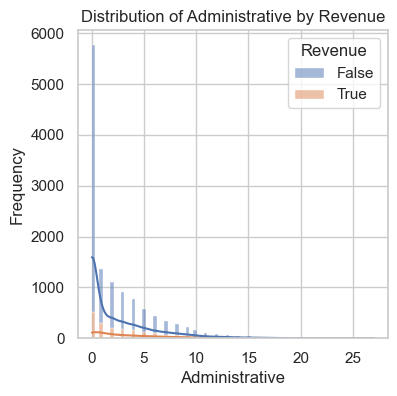

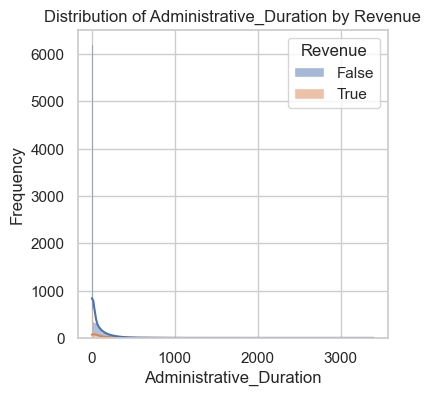

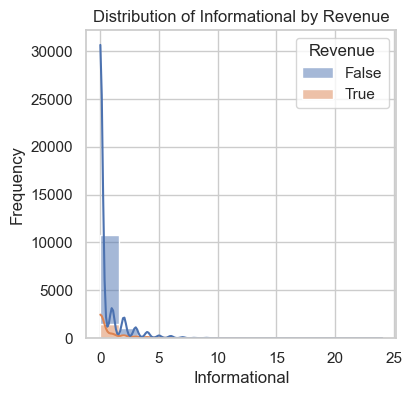

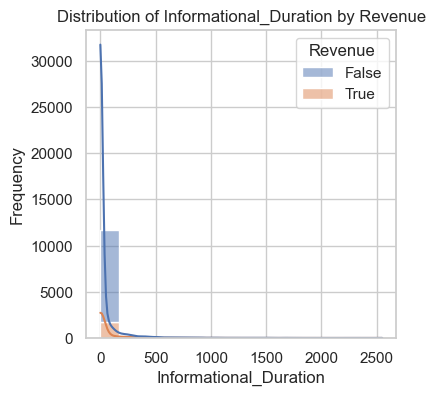

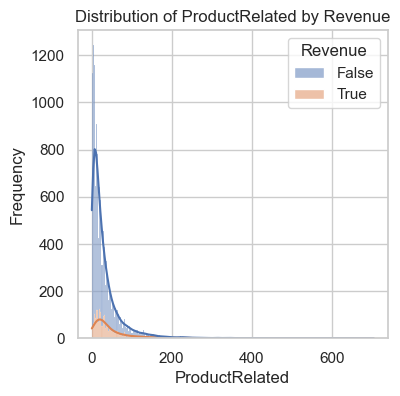

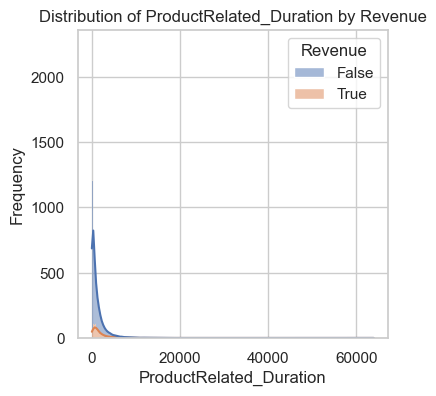

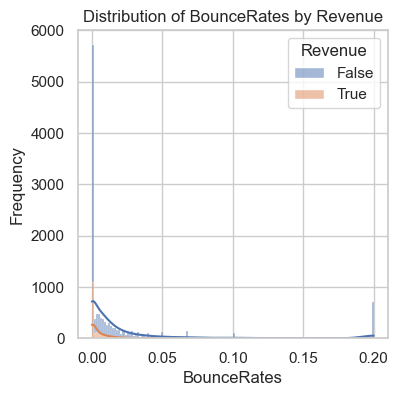

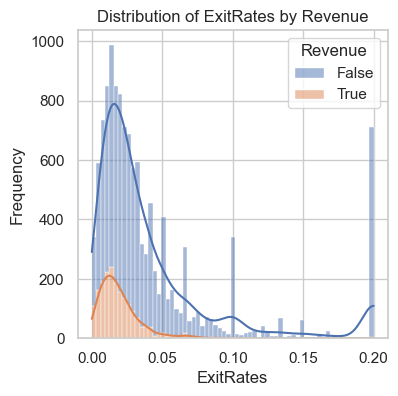

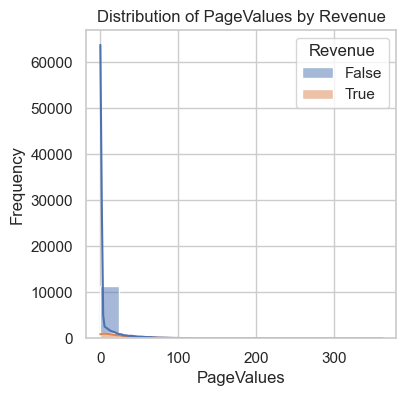

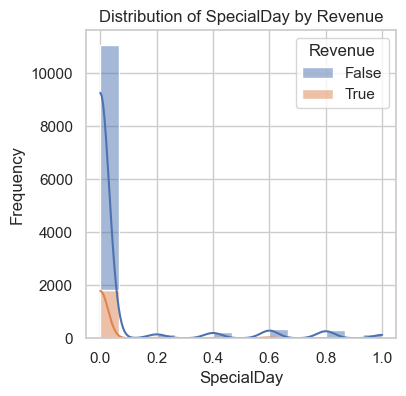

In [25]:
for col in numerical_columns:
    plot_histogram_vs_revenue(df, col)

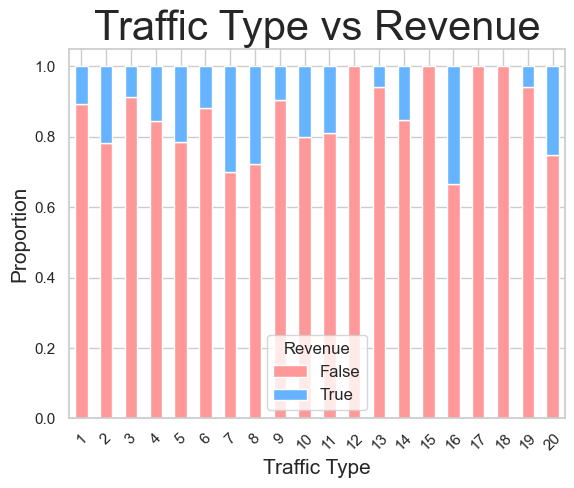

In [26]:
# Create a cross-tabulation of TrafficType and Revenue
df_traf = pd.crosstab(df['TrafficType'], df['Revenue'])

# Plot the stacked bar chart with a new color
df_traf.div(df_traf.sum(1).astype(float), axis=0).plot(
    kind='bar', 
    stacked=True, 
    color=['#ff9999', '#66b3ff']
)

plt.title('Traffic Type vs Revenue', fontsize=30)
plt.xlabel('Traffic Type', fontsize=15)  
plt.ylabel('Proportion', fontsize=15)    
plt.xticks(rotation=45)                   
plt.legend(title='Revenue', fontsize=12)
plt.show()

### Multivariate Analysis

In [27]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

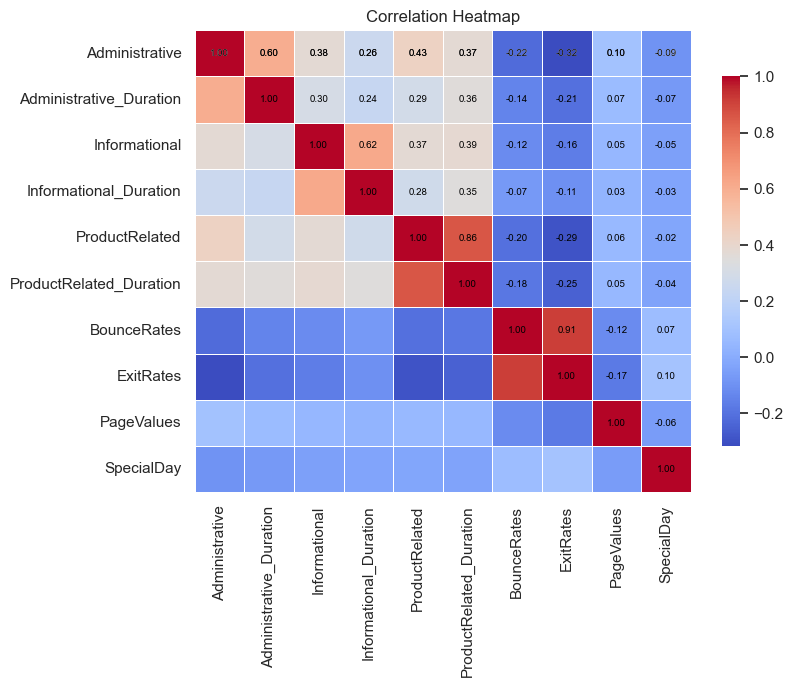

In [28]:
# Compute the correlation matrix
num_col = df[numerical_columns]
correlation_matrix = num_col.corr('pearson')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 7}, fmt=".2f", 
            cbar_kws={'shrink': .8}, linewidths=0.5)

# Overlay the annotations for the upper triangle only
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask[i, j]:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', 
                     ha='center', va='center', color='black', fontsize=7)

plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

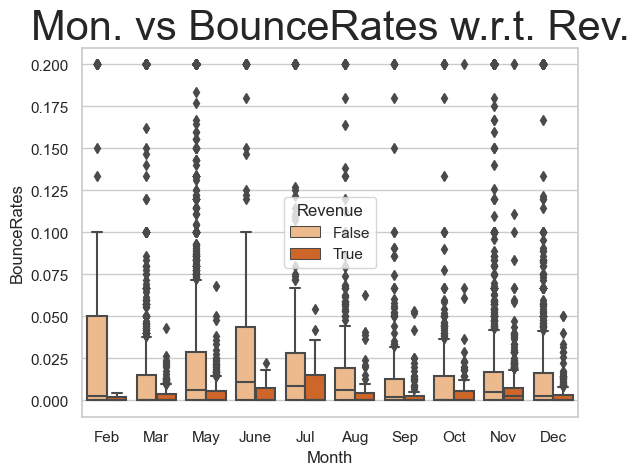

In [29]:
# month vs bouncerates wrt revenue
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

*Bounce Rate* and *Exit Rate* are highly correlated, this can bring redundancy to the model. we can consider removing one to reduce redundancy if the effect is significant. We can run feature selection to determine importance, checking for predictive relevance. As correlation exceeds 0.9, we assess model performance with one removed to ensure accuracy and interpretability are unaffected.

N.B: This is part of preprocessing 

In [30]:
# Encoding categorical variables
label_encoders = {}
df_label_encoded = df.copy()
for column in df_label_encoded.select_dtypes(include=['category','object', 'bool']).columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df_label_encoded.drop(columns='Revenue')
y = df_label_encoded['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model 1: Using both 'Bounce Rate' and 'Exit Rate'
model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

# Model 2: Removing one of the correlated features ('Exit Rate')
X_train_reduced = X_train.drop(columns=['ExitRates'])
X_test_reduced = X_test.drop(columns=['ExitRates'])

model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train_reduced, y_train)
y_pred2 = model2.predict(X_test_reduced)
accuracy2 = accuracy_score(y_test, y_pred2)

# Model 2: Removing one of the correlated features ('Bounce Rate')
X_train_red = X_train.drop(columns=['BounceRates'])
X_test_red = X_test.drop(columns=['BounceRates'])

model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train_red, y_train)
y_pred3 = model3.predict(X_test_red)
accuracy3 = accuracy_score(y_test, y_pred3)

# Compare the performance
print("Model accuracy with both features:", accuracy1)
print("Model accuracy without 'Exit Rate':", accuracy2)
print("Model accuracy without 'Bounce Rate':", accuracy3)


Model accuracy with both features: 0.8940254122735874
Model accuracy without 'Exit Rate': 0.8915923222492566
Model accuracy without 'Bounce Rate': 0.8915923222492566


model with both features performed slightly better so we are dropping any one.

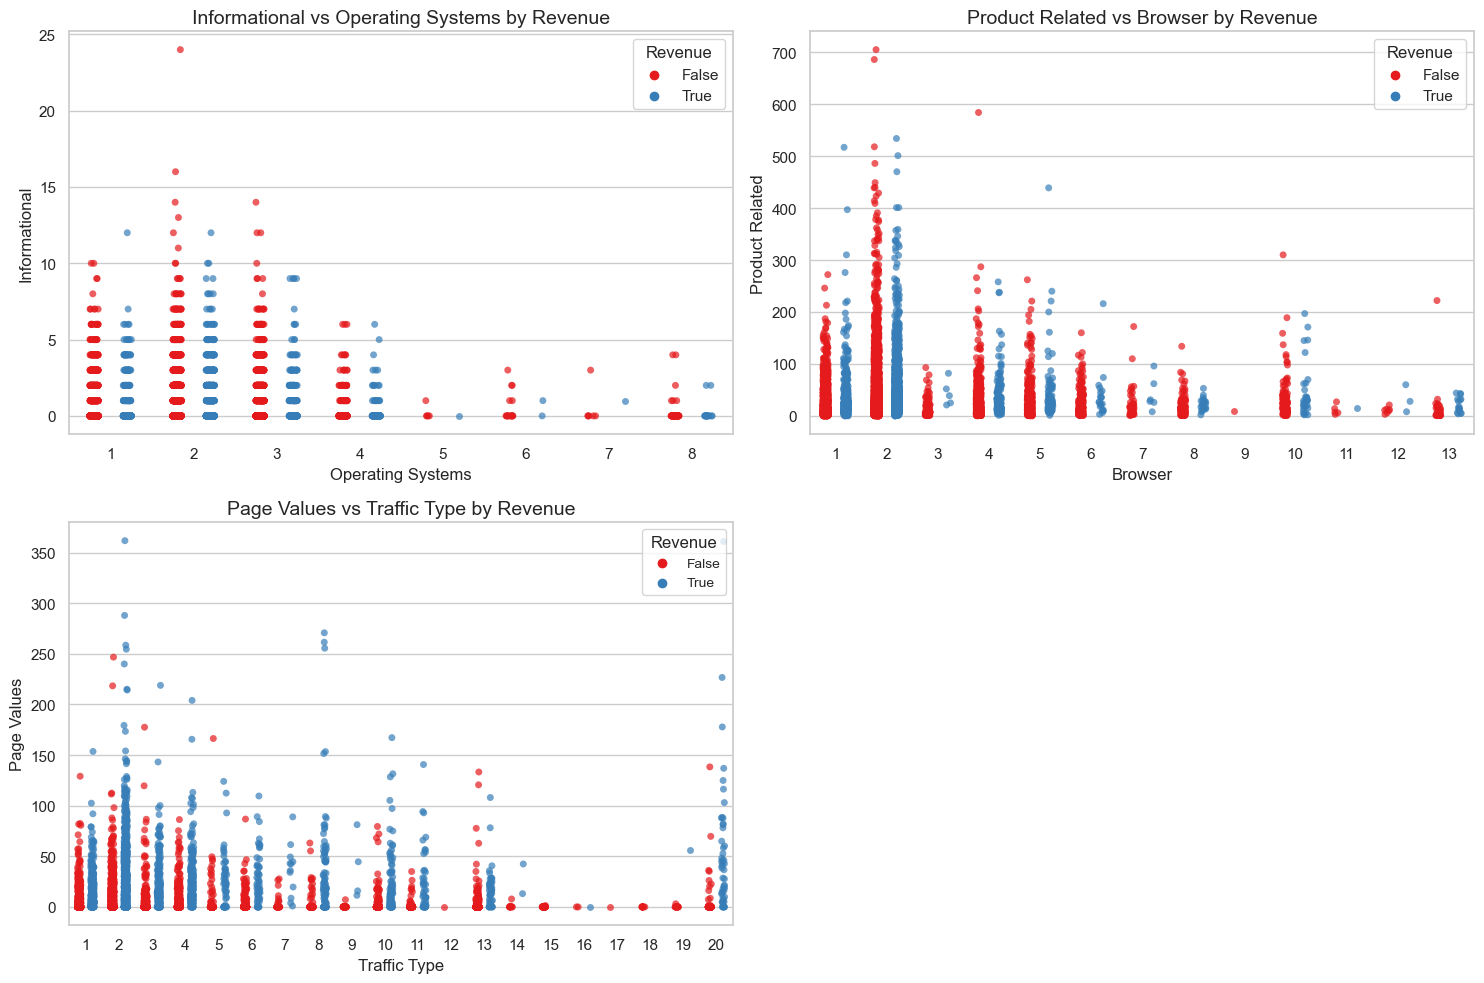

In [31]:
def plot_stripplot(df):
    """
    Create strip plots for three combinations of numerical and categorical variables,
    using 'Revenue' as the hue.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Displays the plots.
    """

    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Combination 1: Informational vs OperatingSystems
    sns.stripplot(data=df, x='OperatingSystems', y='Informational', hue='Revenue', 
                  ax=axes[0, 0], dodge=True, palette='Set1', alpha=0.7)
    axes[0, 0].set_title('Informational vs Operating Systems by Revenue', fontsize=14)
    axes[0, 0].set_xlabel('Operating Systems', fontsize=12)
    axes[0, 0].set_ylabel('Informational', fontsize=12)

    # Combination 2: ProductRelated vs Browser
    sns.stripplot(data=df, x='Browser', y='ProductRelated', hue='Revenue', 
                  ax=axes[0, 1], dodge=True, palette='Set1', alpha=0.7)
    axes[0, 1].set_title('Product Related vs Browser by Revenue', fontsize=14)
    axes[0, 1].set_xlabel('Browser', fontsize=12)
    axes[0, 1].set_ylabel('Product Related', fontsize=12)

    # Combination 3: PageValues vs TrafficType
    sns.stripplot(data=df, x='TrafficType', y='PageValues', hue='Revenue', 
                  ax=axes[1, 0], dodge=True, palette='Set1', alpha=0.7)
    axes[1, 0].set_title('Page Values vs Traffic Type by Revenue', fontsize=14)
    axes[1, 0].set_xlabel('Traffic Type', fontsize=12)
    axes[1, 0].set_ylabel('Page Values', fontsize=12)

    # Remove the last subplot (empty)
    fig.delaxes(axes[1, 1])
    
    plt.tight_layout()
    plt.legend(title='Revenue', loc='upper right', fontsize=10)
    plt.show()

# Example usage:
plot_stripplot(df)

<Axes: xlabel='Weekend', ylabel='PageValues'>

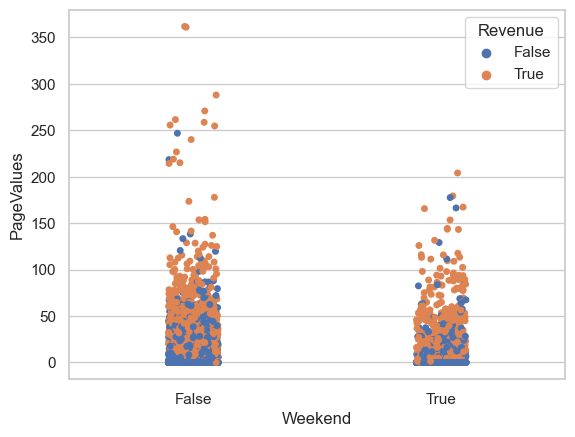

In [32]:
sns.stripplot(x=df['Weekend'], y=df['PageValues'], hue=df['Revenue'])

Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

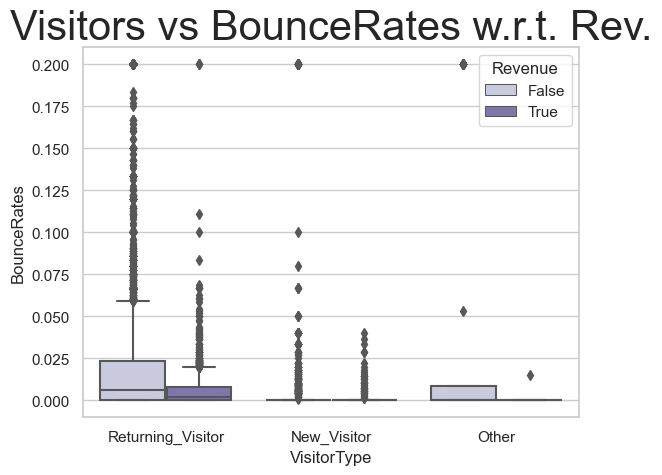

In [33]:
# visitor type vs BounceRates w.r.t revenue
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

In [34]:
df.isnull().sum().sum()

0

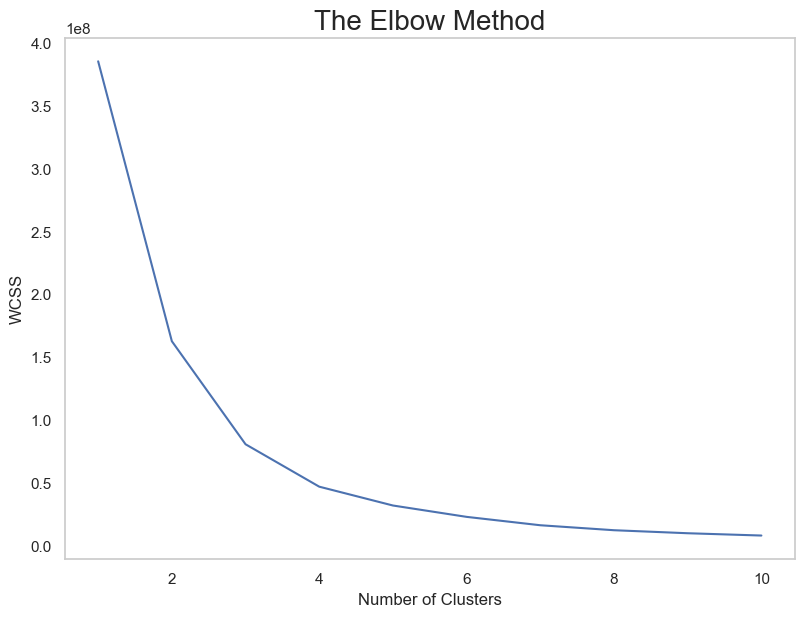

In [35]:
# preparing the dataset
x = df.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape

plt.figure(figsize=(8, 6))
# Calculate WCSS for different cluster counts
wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm='elkan',
        tol=0.001
    )
    km.fit(x)
    
    # Get the cluster labels
    labels = km.labels_  # corrected to labels_
    
    # Append the within-cluster sum of squares (WCSS)
    wcss.append(km.inertia_)

# Plotting the elbow method
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


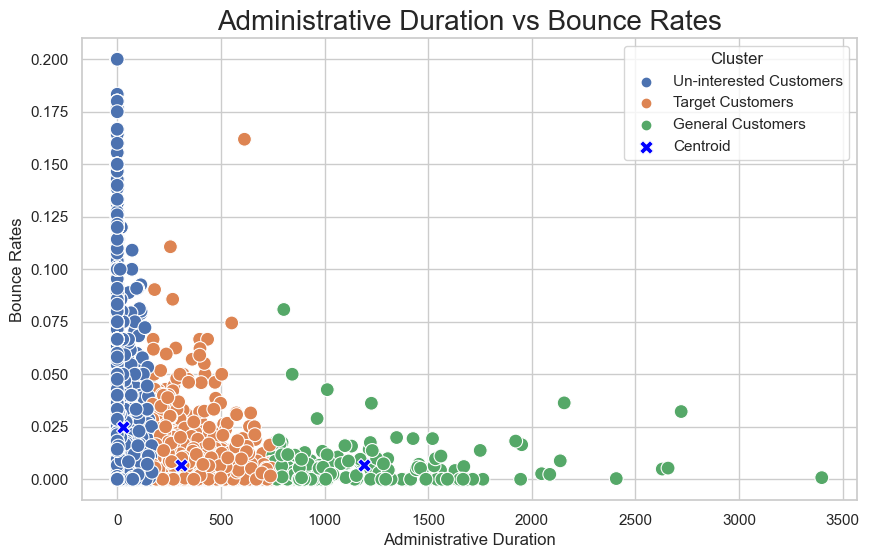

In [36]:
# Prepare the dataset
x = df.iloc[:, [1, 6]].values  # Selecting the columns 'Administrative_Duration' and 'BounceRates'

# Apply KMeans clustering
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Convert the data into a DataFrame for Seaborn plotting
df_plot = pd.DataFrame(x, columns=['Administrative_Duration', 'BounceRates'])
df_plot['Cluster'] = y_means

# Map cluster labels to the target names
cluster_names = {0: 'Un-interested Customers', 1: 'General Customers', 2: 'Target Customers'}
df_plot['Cluster'] = df_plot['Cluster'].map(cluster_names)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Administrative_Duration', y='BounceRates', hue='Cluster', s=100)

# Add the centroids
centroids = km.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, color='blue', label='Centroid', marker='X')

# Add title and labels
plt.title('Administrative Duration vs Bounce Rates', fontsize=20)
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [37]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4531,3,119.00,0,0.0,6,197.500000,0.022222,0.022222,0.000000,1.0,May,6,2,3,2,New_Visitor,True,False
2531,0,0.00,0,0.0,13,392.000000,0.000000,0.026923,0.000000,0.6,May,3,2,1,13,Returning_Visitor,False,False
1487,7,81.25,0,0.0,37,1500.422543,0.014634,0.015339,39.035804,0.0,Mar,2,4,1,2,Returning_Visitor,False,False
1763,0,0.00,0,0.0,2,19.000000,0.000000,0.100000,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
9233,0,0.00,2,248.5,121,4218.074847,0.009985,0.026514,0.624510,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


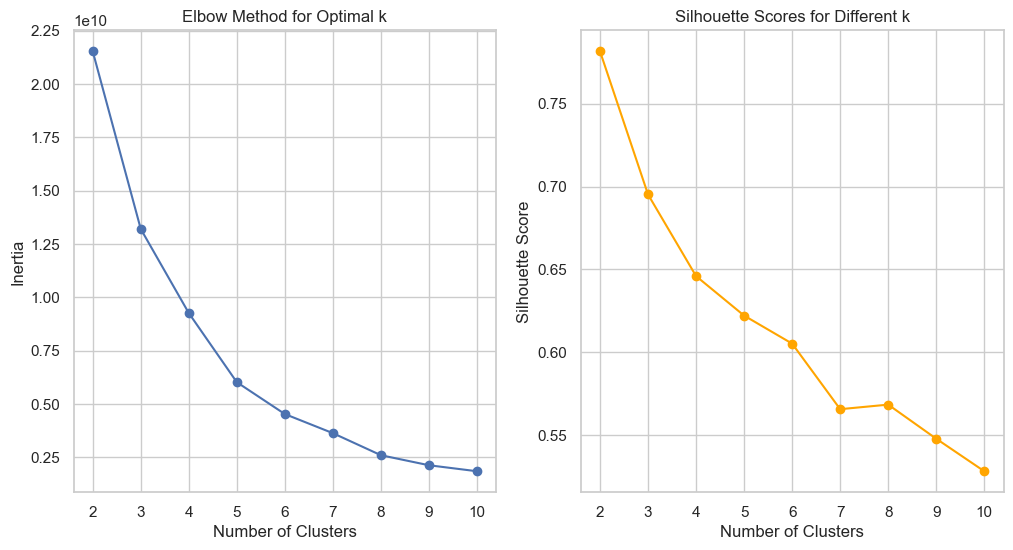

In [38]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Selecting relevant features for clustering
features = df[['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration', 
                'ExitRates', 'PageValues', 'SpecialDay']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


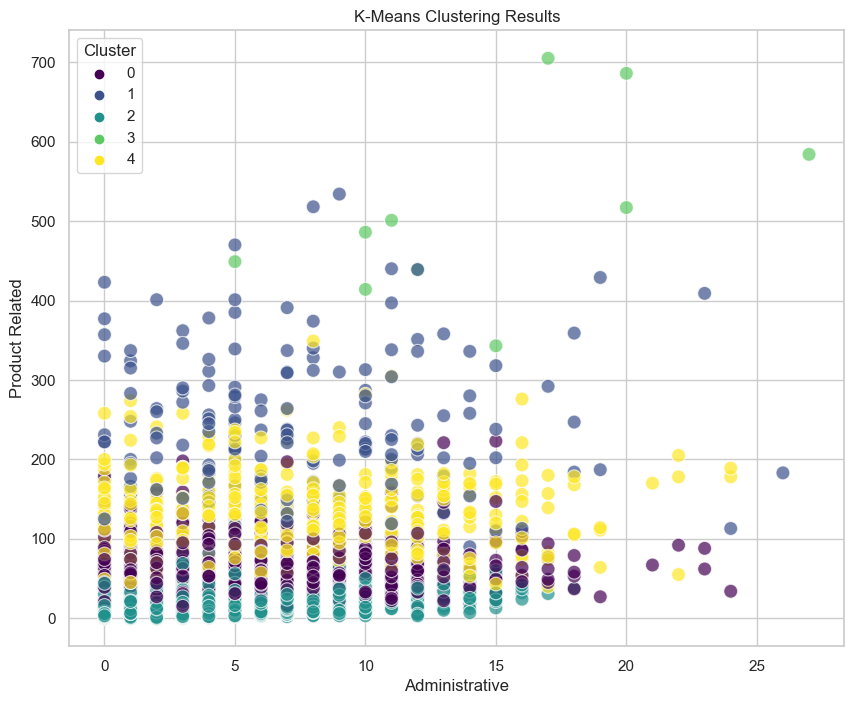

In [39]:
# Choose the number of clusters based on the elbow method or silhouette score
optimal_clusters = 5  # Adjust based on your analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Administrative', y='ProductRelated', hue='Cluster', 
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('Administrative')
plt.ylabel('Product Related')
plt.legend(title='Cluster')
plt.show()

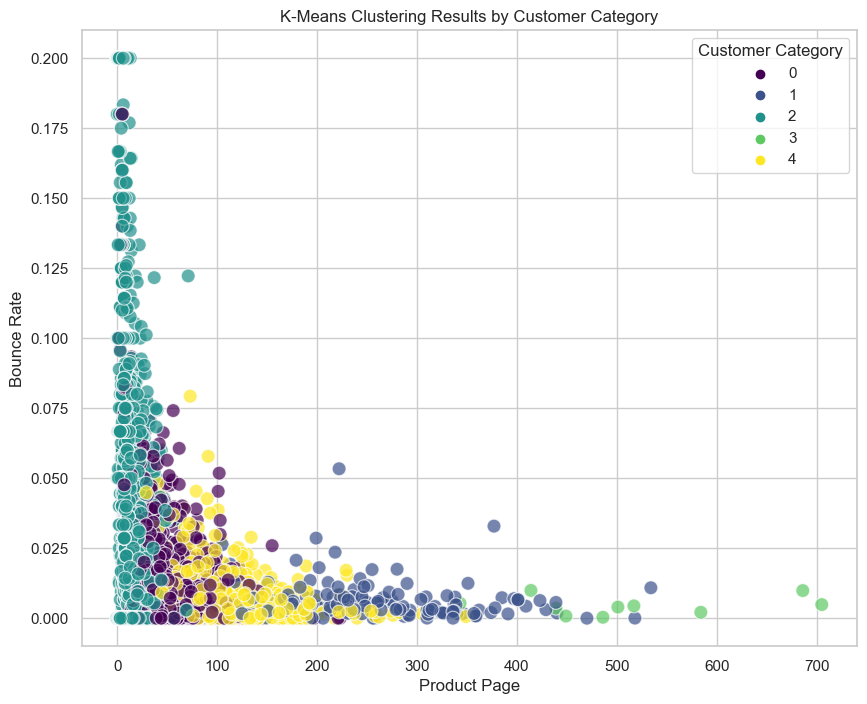

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ProductRelated', y='BounceRates', hue='Cluster', 
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results by Customer Category')
plt.xlabel('Product Page')
plt.ylabel('Bounce Rate')
plt.legend(title='Customer Category')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  int64   
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  int64   
 14  Traffi

### Preprocessing

In [42]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [43]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [44]:
df_copy = df_pure.copy()

In [45]:
#Label Encoding
le = LabelEncoder()
df_copy['Revenue'] = le.fit_transform(df_copy['Revenue'])
df_copy['TrafficType'] = le.fit_transform(df_copy['TrafficType'])
df_copy['Month'] = le.fit_transform(df_copy['Month'])
df_copy['Browser'] = le.fit_transform(df_copy['Browser'])

In [46]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [47]:
df_copy['Month'].value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

In [48]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  int32   
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  category
 14  Traffi

Preprocessing Steps
* Make a copy of the data
* Label Encodeing - Traffictype, BrowserType and Month are label encoded because high cardinality tendencies
* One hot encoding - the other categorical variable
* Pipeline for Hybrid sampling - SMOTE 60% oversampling and 80% undersampling according to the paper.
* MinMax Scaling numerical varibles because of the fact that most of the columns do not follow normal distribution upon visual inspection of distribution.
* Data Splitting

In [49]:
# one hot encoding
data1 = pd.get_dummies(df_copy)
data1.columns
#Remember: to Smote

print(df_copy['Revenue'].value_counts())
# getting dependent and independent variables
x=data1
# removing the target column revenue from 
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Revenue
0    10422
1     1908
Name: count, dtype: int64
Shape of x: (12330, 34)
Shape of y: (12330,)


### Data Splitting

In [50]:
y.value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 34)
Shape of y_train : (8631,)
Shape of x_test : (3699, 34)
Shape of y_test : (3699,)


In [52]:
y_train.value_counts()

Revenue
0    7345
1    1286
Name: count, dtype: int64

In [53]:
numerical_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

### Numerical Data Transformation

In [54]:

# 3. Min-Max scale numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])


In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', numerical_transformer, numerical_columns)
    ]
)

In [56]:
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

### Hybrid Sampling Startegy

In [57]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [58]:
y_train.value_counts()

Revenue
0    7345
1    1286
Name: count, dtype: int64

In [59]:
# Apply SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

# Apply Random Undersampling
undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)


In [60]:
print(len(X_resampled))
print(len(y_resampled))

9915
9915


### Random Grid Search for best hyperparams 

In [62]:

# Define classifiers and their hyperparameter grids
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), {
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75, 1.0]
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    'MLP': (MLPClassifier(max_iter=200, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive']
    }),
    'LogisticRegression': (LogisticRegression(random_state=42), {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear']
    })
}

In [74]:
models.items()

dict_items([('RandomForest', (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]})), ('DecisionTree', (DecisionTreeClassifier(random_state=42), {'max_features': ['auto', 'sqrt'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})), ('GradientBoosting', (GradientBoostingClassifier(random_state=42), {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})), ('XGBoost', (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, ga

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# Set up StratifiedKFold cross-validator
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize an empty list to store the results
results = []

# Loop through each model
for model_name, (model, param_grid) in models.items():
    # Initialize RandomizedSearchCV with the model and hyperparameter grid
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=100,         # Number of combinations to try
        cv=strat_kfold,              # 5-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1          # Use all available cores
    )
    
    # Fit the model to the training data
    random_search.fit(X_train, y_train)
    
    # Append the best model and its score to results
    results.append((model_name, random_search.best_estimator_, random_search.best_score_))

# Print the results
for name, model, score in results:
    print(f"Model: {name}, Best Score: {score:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
